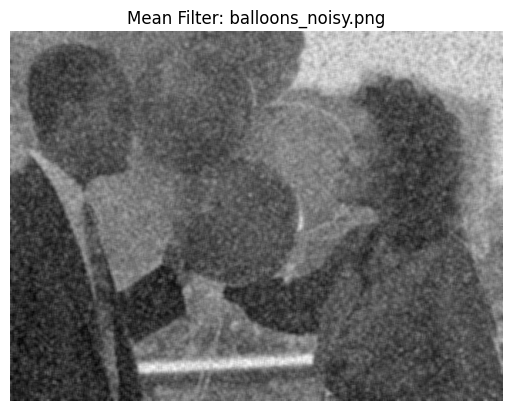

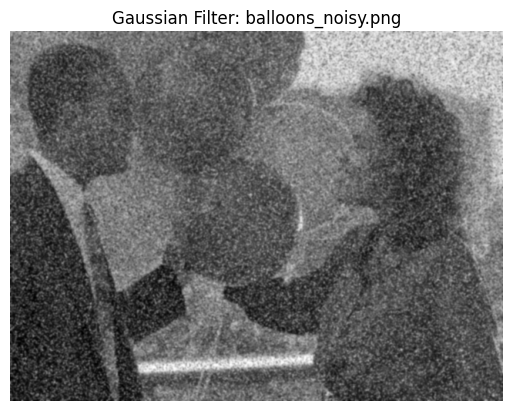

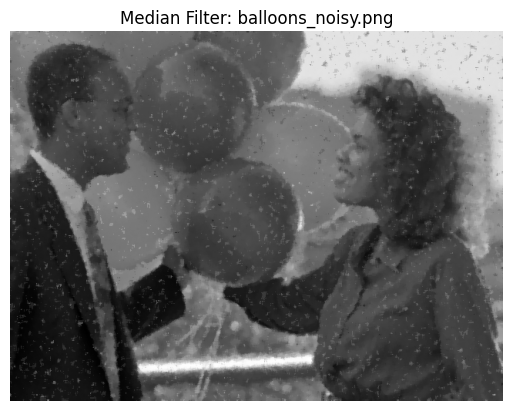

Variance trung bình các filter (thấp hơn là ảnh mượt hơn):
mean: 1370.32
gaussian: 1487.43
median: 2437.50
Filter khử nhiễu tốt nhất: mean


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys
import random

folder_path = 'Exercise'
output_base = 'Exercise_denoised'
os.makedirs(output_base, exist_ok=True)

filters = {
    'mean': lambda img: uniform_filter(img, size=5),
    'gaussian': lambda img: gaussian_filter(img, sigma=1),
    'median': lambda img: median_filter(img, size=5),
}

def calculate_variance(arr):
    return np.var(arr)

variance_results = {filt: [] for filt in filters}

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg')):
        filepath = os.path.join(folder_path, filename)
        img = Image.open(filepath).convert('L')
        arr = np.array(img)

        for filt_name, filt_func in filters.items():
            filtered = filt_func(arr)
            filtered = np.clip(filtered, 0, 255).astype(np.uint8)

            out_folder = os.path.join(output_base, filt_name)
            os.makedirs(out_folder, exist_ok=True)

            out_path = os.path.join(out_folder, filename)
            Image.fromarray(filtered).save(out_path)

            plt.figure()
            plt.title(f'{filt_name.capitalize()} Filter: {filename}')
            plt.axis('off')
            plt.imshow(filtered, cmap='gray')

            variance_results[filt_name].append(calculate_variance(filtered))

plt.show()

avg_variances = {k: np.mean(v) for k, v in variance_results.items()}
print("Variance trung bình các filter (thấp hơn là ảnh mượt hơn):")
for filt_name, avg_var in avg_variances.items():
    print(f"{filt_name}: {avg_var:.2f}")

best_filter = min(avg_variances, key=avg_variances.get)
print(f"Filter khử nhiễu tốt nhất: {best_filter}")



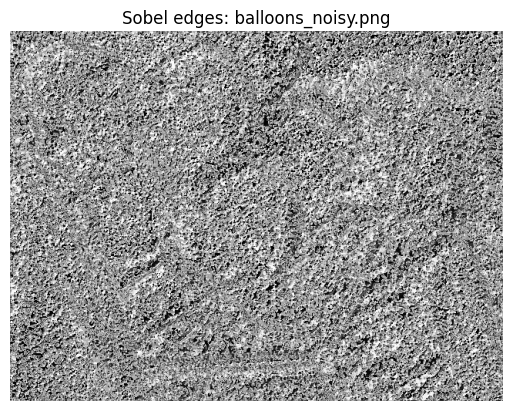

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys
import random

input_folder = 'Exercise'
output_folder = 'Exercise_edges_sobel'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg')):
        filepath = os.path.join(input_folder, filename)

        img = Image.open(filepath).convert('L')
        arr = np.array(img)

        # Khử nhiễu median filter
        denoised = median_filter(arr, size=3)

        # Tính biên theo Sobel
        sx = sobel(denoised, axis=0, mode='constant')
        sy = sobel(denoised, axis=1, mode='constant')

        sobel_magnitude = np.hypot(sx, sy)
        sobel_magnitude = (sobel_magnitude / sobel_magnitude.max()) * 255
        sobel_magnitude = sobel_magnitude.astype(np.uint8)

        out_path = os.path.join(output_folder, filename)
        Image.fromarray(sobel_magnitude).save(out_path)

        plt.figure()
        plt.title(f'Sobel edges: {filename}')
        plt.axis('off')
        plt.imshow(sobel_magnitude, cmap='gray')

plt.show()


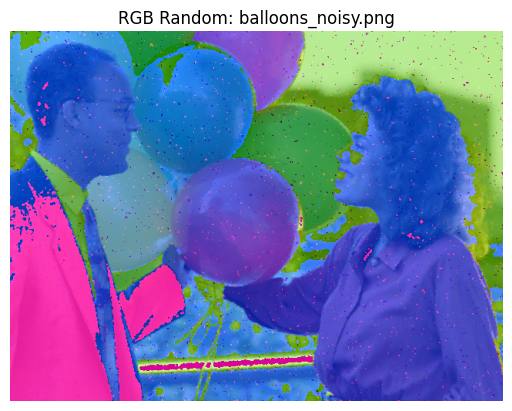

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys
import random

input_folder = 'Exercise'
output_folder = 'Exercise_RGBrandom'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg')):
        filepath = os.path.join(input_folder, filename)

        img = Image.open(filepath).convert('RGB')
        arr = np.array(img)

        # Khử nhiễu median filter từng kênh
        denoised = np.zeros_like(arr)
        for c in range(3):
            denoised[:, :, c] = median_filter(arr[:, :, c], size=3)

        # Đổi màu RGB ngẫu nhiên
        random_r = random.randint(0, 255)
        random_g = random.randint(0, 255)
        random_b = random.randint(0, 255)

        new_img = denoised.copy()
        # Thêm màu ngẫu nhiên (chẳng hạn cộng thêm và clip)
        new_img[:, :, 0] = np.clip(new_img[:, :, 0] + random_r, 0, 255)
        new_img[:, :, 1] = np.clip(new_img[:, :, 1] + random_g, 0, 255)
        new_img[:, :, 2] = np.clip(new_img[:, :, 2] + random_b, 0, 255)

        out_path = os.path.join(output_folder, filename)
        Image.fromarray(new_img.astype(np.uint8)).save(out_path)

        plt.figure()
        plt.title(f'RGB Random: {filename}')
        plt.axis('off')
        plt.imshow(new_img)

plt.show()



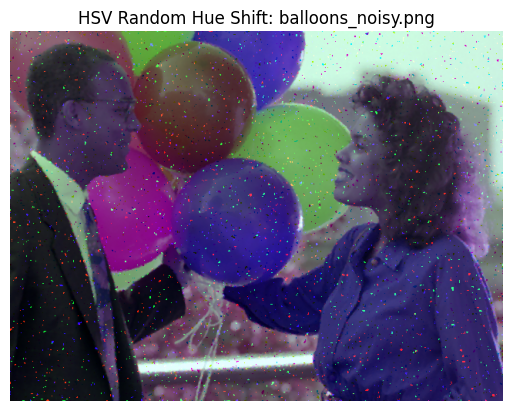

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys
import random

input_folder = 'Exercise'
output_folder = 'Exercise_HSVrandom'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg')):
        filepath = os.path.join(input_folder, filename)

        img = Image.open(filepath).convert('RGB')
        arr = np.array(img) / 255.0

        # Khử nhiễu median filter từng kênh
        denoised = np.zeros_like(arr)
        for c in range(3):
            denoised[:, :, c] = median_filter(arr[:, :, c], size=3)

        # Chuyển từng pixel sang HSV
        h_arr = np.zeros((arr.shape[0], arr.shape[1]))
        s_arr = np.zeros_like(h_arr)
        v_arr = np.zeros_like(h_arr)

        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                r, g, b = denoised[i, j]
                h, s, v = colorsys.rgb_to_hsv(r, g, b)
                h_arr[i, j] = h
                s_arr[i, j] = s
                v_arr[i, j] = v

        # Đổi màu H ngẫu nhiên nhưng không trùng, theo từng ảnh
        random_hue_shift = random.uniform(0, 1)

        h_new = (h_arr + random_hue_shift) % 1.0

        rgb_new = np.zeros_like(arr)
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                r, g, b = colorsys.hsv_to_rgb(h_new[i, j], s_arr[i, j], v_arr[i, j])
                rgb_new[i, j] = [r, g, b]

        rgb_new = np.clip(rgb_new, 0, 1)

        rgb_new_uint8 = (rgb_new * 255).astype(np.uint8)
        out_path = os.path.join(output_folder, filename)
        Image.fromarray(rgb_new_uint8).save(out_path)

        plt.figure()
        plt.title(f'HSV Random Hue Shift: {filename}')
        plt.axis('off')
        plt.imshow(rgb_new)

plt.show()

